# <center>ANALISI COVID 19</center>
<p style='text-align: justify;'>Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il <a href = 'https://github.com/owid/covid-19-data/tree/master/public/data'>dataset</a>, curato da Our World in Data.

In [1]:
# Per prima cosa, importo tutte le librerie che potrebbero servirmi ai fini dell'analisi.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Adesso importo il dataset e lo stampo.
link = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
ds = pd.read_csv(link)
ds

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


## Esercizio 1
<br>
- Si richiede di verificare le dimensioni del dataset e i relativi metadati

In [3]:
print(f'Il dataset ha {ds.shape[0]} righe e {ds.shape[1]} colonne. I suoi metadati sono:')
print ('\n')
ds.info()

Il dataset ha 429435 righe e 67 colonne. I suoi metadati sono:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_d

## Esercizio 2
- il numero di casi fin dall'inizio della pandemia;
- la percentuale rispetto al totale mondiale del numero di casi.

In [4]:
# Viste le descrizioni delle colonne nel scritte sito del dataset, ho scelto di utilizzare la colonna 
# "new_cases" (assieme a "continent") per le operazioni. Mi creo le variabili che sicuramente serviranno:

continent = ds['continent']
new_cases = ds['new_cases']

# Controllo i nulli in entrambe le colonne:

ds[['continent', 'new_cases']].isnull().sum()

continent    26525
new_cases    19276
dtype: int64

In [5]:
# Capiamo il motivo di questi nulli e come trattarli. Riguardo a "new_cases", i nulli sono totalmente normali
# in quanto può capitare che in un giorno non venga registrato alcun caso. Tuttavia, in fase di esplorazione ho
# notato che "new_cases" viene aggiornato, quando serve, settimanalmente. Ecco una prova:

ds[ds['location'] == 'Italy'][new_cases != 0].head(10)


C:\Users\gabri\AppData\Local\Temp\ipykernel_33536\2200700348.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ds[ds['location'] == 'Italy'][new_cases != 0].head(10)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
185303,ITA,Europe,Italy,2020-02-02,3.0,3.0,0.429,0.0,0.0,0.000,...,27.8,NaN,3.18,83.51,0.892,59037472,-6878.1000,-9.02,-6.19,-115.597200
185324,ITA,Europe,Italy,2020-02-23,79.0,76.0,10.857,2.0,2.0,0.286,...,27.8,NaN,3.18,83.51,0.892,59037472,-8888.8000,-7.49,-4.77,-149.390150
185331,ITA,Europe,Italy,2020-03-01,1128.0,1049.0,149.857,29.0,27.0,3.857,...,27.8,NaN,3.18,83.51,0.892,59037472,-9038.8990,-6.82,-1.08,-151.912810
185338,ITA,Europe,Italy,2020-03-08,5883.0,4755.0,679.286,233.0,204.0,29.143,...,27.8,NaN,3.18,83.51,0.892,59037472,-7883.3994,-5.40,8.53,-132.492830
185345,ITA,Europe,Italy,2020-03-15,21157.0,15274.0,2182.000,1441.0,1208.0,172.571,...,27.8,NaN,3.18,83.51,0.892,59037472,-2833.6992,-1.78,38.30,-47.624737
185352,ITA,Europe,Italy,2020-03-22,53578.0,32421.0,4631.571,4825.0,3384.0,483.429,...,27.8,NaN,3.18,83.51,0.892,59037472,6413.4004,3.73,72.92,107.787200
185359,ITA,Europe,Italy,2020-03-29,92472.0,38894.0,5556.286,10023.0,5198.0,742.571,...,27.8,NaN,3.18,83.51,0.892,59037472,17233.3000,9.33,85.62,289.632500
185366,ITA,Europe,Italy,2020-04-05,124632.0,32160.0,4594.286,15362.0,5339.0,762.714,...,27.8,NaN,3.18,83.51,0.892,59037472,25765.4000,13.08,68.98,433.027740
185373,ITA,Europe,Italy,2020-04-12,152271.0,27639.0,3948.429,19468.0,4106.0,586.571,...,27.8,NaN,3.18,83.51,0.892,59037472,32570.5000,15.57,56.04,547.398100
185380,ITA,Europe,Italy,2020-04-19,175925.0,23654.0,3379.143,23227.0,3759.0,537.000,...,27.8,NaN,3.18,83.51,0.892,59037472,37374.0000,16.90,40.18,628.128360


In [6]:
# Piuttosto, sarebbe strano avere dei risultati negativi in "new_cases":

(new_cases < 0).sum()

0

In [7]:
# "new_cases" non presenta particolari irregolarità. Adesso controlliamo i nulli di 'continent'.

ds[pd.isnull(continent)].sample(30)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
220448,OWID_LMC,NaN,Lower-middle-income countries,2022-10-04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3432097300,NaN,NaN,NaN,NaN
20935,OWID_ASI,NaN,Asia,2022-04-27,146563664.0,0.0,191643.571,1421944.0,0.0,556.714,...,NaN,NaN,NaN,NaN,NaN,4721383370,NaN,NaN,NaN,NaN
218250,OWID_LIC,NaN,Low-income countries,2020-04-20,3759.0,0.0,167.571,409.0,0.0,38.714,...,NaN,NaN,NaN,NaN,NaN,737604900,NaN,NaN,NaN,NaN
118761,OWID_EUR,NaN,Europe,2020-07-15,2386128.0,0.0,13306.857,198686.0,0.0,363.571,...,NaN,NaN,NaN,NaN,NaN,744807803,NaN,NaN,NaN,NaN
221906,OWID_LMC,NaN,Lower-middle-income countries,2022-02-22,76845164.0,0.0,159497.143,1121109.0,0.0,1387.714,...,NaN,NaN,NaN,NaN,NaN,3432097300,NaN,NaN,NaN,NaN
217620,OWID_LIC,NaN,Low-income countries,2022-07-26,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,737604900,NaN,NaN,NaN,NaN
358676,OWID_SAM,NaN,South America,2023-01-21,67324574.0,0.0,26627.000,1344420.0,0.0,132.000,...,NaN,NaN,NaN,NaN,NaN,436816679,NaN,NaN,NaN,NaN
21278,OWID_ASI,NaN,Asia,2023-04-05,295403799.0,0.0,26077.286,1625259.0,0.0,94.286,...,NaN,NaN,NaN,NaN,NaN,4721383370,NaN,NaN,NaN,NaN
423314,OWID_WRL,NaN,World,2021-08-12,202405736.0,0.0,631701.286,4338810.0,0.0,9844.571,...,34.635,60.13,2.705,72.58,0.737,7975105024,NaN,NaN,NaN,NaN
217752,OWID_LIC,NaN,Low-income countries,2022-12-05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,737604900,NaN,NaN,NaN,NaN


In [8]:
# Dato che non è possibile decidere cosa fare di questi nulli senza un consulto, non li considererò in sede di analisi.
# Non li dropperò in quanto non voglio intervenire sul dataset, ma non li includerò nei calcoli. Inizio a svolgere la traccia.

# Creo le variabili che mi serviranno.
ncases_continent = ds.groupby('continent').new_cases.sum()
totmondiale = ncases_continent.sum()

# Produco un risultato leggibile.
for continent, cases in ncases_continent.items():
    print(f'In {continent} ci sono {int(cases):,} casi.')

print('\n')
print(f'Al mondo in totale ci sono {int(totmondiale):,} casi.')

In Africa ci sono 13,146,831 casi.
In Asia ci sono 301,564,180 casi.
In Europe ci sono 252,916,868 casi.
In North America ci sono 124,492,698 casi.
In Oceania ci sono 15,003,468 casi.
In South America ci sono 68,811,012 casi.


Al mondo in totale ci sono 775,935,057 casi.


Text(0.5, 1.0, 'Distribuzione percentuale dei casi per continente')

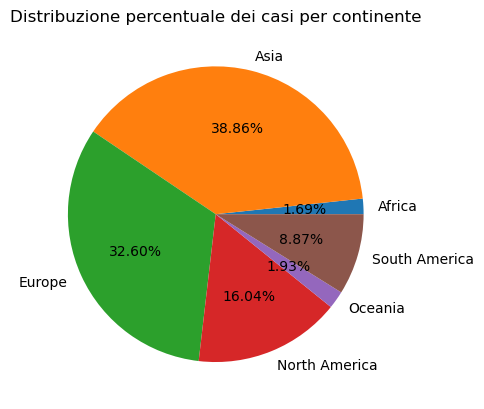

In [9]:
# Calcoliamo le percentuali e stampiamo un grafico a torta.
percentuali = ((ncases_continent / totmondiale) * 100).round(2)

plt.pie(percentuali, labels=percentuali.index, autopct='%1.2f%%')
plt.title('Distribuzione percentuale dei casi per continente')

## Esercizio 3
- Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati:
    - l'evoluzione del casi totali dall'inizio alla fine dell'anno;
    - il numero di nuovi casi rispetto alla data;
        - poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni.

In [10]:
# Trasformo i dati in 'date' in formato data e controllo.
ds['date'] = pd.to_datetime(ds['date'] , format = '%Y-%m-%d')
ds['date'].dtype

dtype('<M8[ns]')

In [11]:
# Creo le maschere per l'Italia e per l'anno 2022.
ita = ds.location == 'Italy'
y2022 = ds.date.dt.year == 2022

# Adesso, creo un filtro che isoli le colonne di interesse.
y2022ita = ds[(ita & y2022)][['location', 'date', 'total_cases' , 'new_cases']]
y2022ita

,location,date,total_cases,new_cases
186002,Italy,2022-01-01,5622431.0,0.0
186003,Italy,2022-01-02,6267035.0,644604.0
186004,Italy,2022-01-03,6267035.0,0.0
186005,Italy,2022-01-04,6267035.0,0.0
186006,Italy,2022-01-05,6267035.0,0.0
...,...,...,...,...
186362,Italy,2022-12-27,25060503.0,0.0
186363,Italy,2022-12-28,25060503.0,0.0
186364,Italy,2022-12-29,25060503.0,0.0
186365,Italy,2022-12-30,25060503.0,0.0


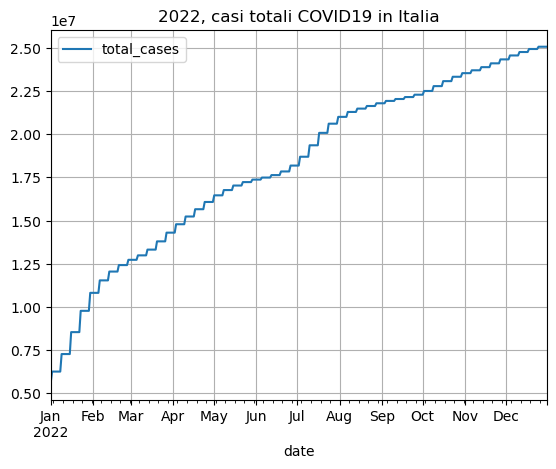

In [12]:
# Noto che i numeri in "total_cases" e in "new_cases" sono decimali, quindi li converto in interi.
y2022ita[['total_cases' , 'new_cases']] = y2022ita[['total_cases' , 'new_cases']].astype('int')

# Inizio con i grafici. Ne farò uno con Pandas e l'altro con Seaborn.
y2022ita.plot(kind='line' , x='date' , y='total_cases' , title='2022, casi totali COVID19 in Italia')
plt.grid(True)

Text(0.5, 1.0, '2022, nuovi casi COVID19 in Italia')

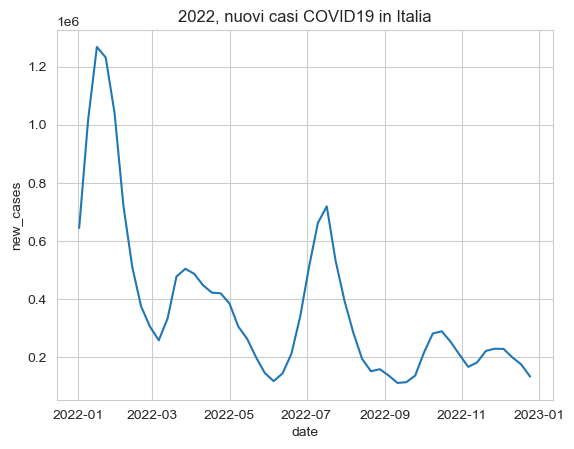

In [13]:
# Adesso faccio il grafico per "new_cases", per prima cosa escludo i valori a 0 con una maschera e infine creo un nuovo filtro.
ita_no_0 = y2022ita['new_cases'] != 0
y2022ita_no_0 = y2022ita[ita_no_0]

# Creo il grafico, questa volta con Seaborn.
sns.set_style('whitegrid')
y2022ita_no_0_line =sns.lineplot(data=y2022ita_no_0, x='date', y='new_cases')
y2022ita_no_0_line.set_title('2022, nuovi casi COVID19 in Italia')

## Esercizio 4
- Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso);
    - scrivere un breve commento a riguardo.

In [14]:
# Creo le maschere per l'analisi.
mag2022_apr2023 = (ds['date'] >= '2022-05-01') & (ds['date'] <= '2023-04-30')
ita_ger_fra = ds['location'].isin(['Italy', 'Germany', 'France'])

# E adesso il filtro. Ho provato a convertire "icu_patient" in numero intero sostitudendo i nulli con 0, cosicché non andassero
# in contrasto con .astype(int). Tuttavia, ciò creava delle irregolarità nel grafico. quindi ho mantenuto tutto per com'era. 
icu = ds[(ita_ger_fra & mag2022_apr2023)][['location', 'date', 'icu_patients']]
icu

,location,date,icu_patients
131214,France,2022-05-01,1557.0
131215,France,2022-05-02,1511.0
131216,France,2022-05-03,1498.0
131217,France,2022-05-04,1465.0
131218,France,2022-05-05,1447.0
...,...,...,...
186482,Italy,2023-04-26,100.0
186483,Italy,2023-04-27,99.0
186484,Italy,2023-04-28,105.0
186485,Italy,2023-04-29,111.0


Text(0.5, 1.0, '05-2022 / 04-2023, pazienti in terapia intensiva in Francia, Germania e Italia')

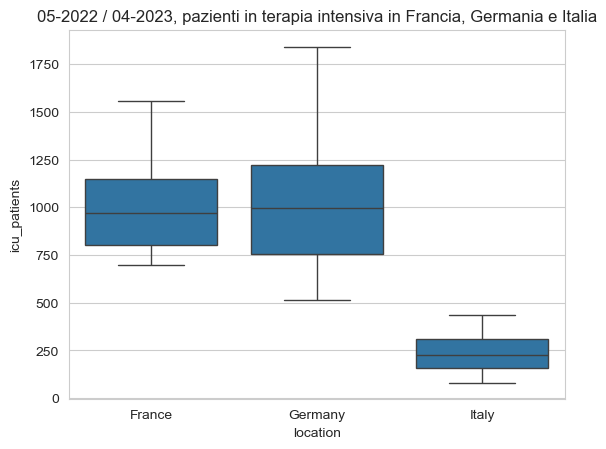

In [15]:
# Creo il boxplot.
sns.set_style('whitegrid')
icu_boxplot = sns.boxplot(data=icu , x='location' , y='icu_patients')
icu_boxplot.set_title('05-2022 / 04-2023, pazienti in terapia intensiva in Francia, Germania e Italia')

### Commento sui risultati dell'analisi.
<p style='text-align: justify;'>Il boxplot presentato mostra la distribuzione del numero di pazienti in terapia intensiva nei tre paesi indicati nel periodo compreso tra maggio 2022 e aprile 2023.
<br>
È evidente una grande disparità nel numero medio di pazienti in terapia intensiva tra i tre paesi. Infatti, la Germania e la Francia presentano valori medi molto più elevati rispetto all'Italia. La lunghezza dei box e dei baffi indica la variabilità dei dati all'interno di ciascun paese. In Germania e in Francia, la variabilità sembra essere superiore rispetto all'Italia. Quindi, nei primi due paesi si presentano fluttuazioni più ampie nel numero di pazienti nel tempo, soprattutto in Germania che mostra picchi molto alti. 
<br>
Il numero di pazienti in terapia intensiva può essere influenzato da numerosi fattori (l'età e il numero della popolazione, le politiche sanitarie, la diffusione di varianti virali, i posti disponibili negli ospedali, ecc). Un'analisi più approfondita dovrebbe considerare questi fattori.

## Esercizio 5
- Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023:
    - mostrare la somma dei pazienti ospitalizzati per ognuna;
    - se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno.

In [16]:
# Creo le maschere ai fini dell'analisi.
y2023 = ds['date'].dt.year == 2023
ita_ger_fra_spa = ds['location'].isin(['Italy', 'Germany', 'France', 'Spain'])

# Faccio il filtro.
y2023hosp = ds[(ita_ger_fra_spa & y2023)][['location', 'date', 'hosp_patients']]
y2023hosp

,location,date,hosp_patients
131459,France,2023-01-01,24157.0
131460,France,2023-01-02,24075.0
131461,France,2023-01-03,23516.0
131462,France,2023-01-04,23167.0
131463,France,2023-01-05,22664.0
...,...,...,...
364038,Spain,2023-12-27,NaN
364039,Spain,2023-12-28,NaN
364040,Spain,2023-12-29,NaN
364041,Spain,2023-12-30,NaN


In [17]:
# Creo le variabili che mi serviranno.
hosp_location = y2023hosp.groupby('location').hosp_patients.sum()
tot_hosp = hosp_location.sum()

# Produco un risultato leggibile, molto simile a ciò che ho fatto per il primo esercizio.
for location, patients in hosp_location.items():
    print(f'In {location} ci sono {int(patients):,} pazienti ospitalizzati.')

print('\n')
print(f'In totale in Italia, Germania, Francia e Spagna ci sono {int(tot_hosp):,} pazienti ospitalizzati.')

In France ci sono 1,382,574 pazienti ospitalizzati.
In Germany ci sono 0 pazienti ospitalizzati.
In Italy ci sono 1,175,272 pazienti ospitalizzati.
In Spain ci sono 354,602 pazienti ospitalizzati.


In totale in Italia, Germania, Francia e Spagna ci sono 2,912,448 pazienti ospitalizzati.


<Axes: title={'center': '2023, somma dei pazienti ospedalizzati in Italia, Germania, Francia e Spagna'}, xlabel='location'>

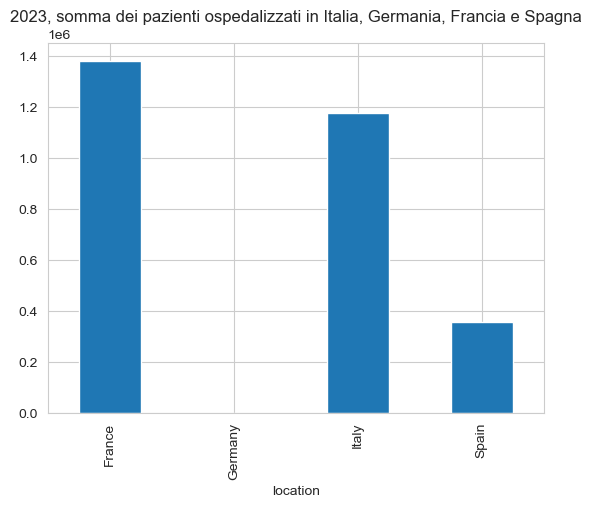

In [18]:
# Un grafico a barre si presenta bene per la visualizzazione in questo caso.
hosp_location.plot(kind='bar', title='2023, somma dei pazienti ospedalizzati in Italia, Germania, Francia e Spagna')

In [19]:
# Adesso controlliamo se ci sono dei nulli.
y2023hosp['hosp_patients'].isnull().sum()

843

### Commento sui nulli.
<p style='text-align: justify;'>Sono presenti 834 valori nulli nella colonna hosp_patients, con un'assenza totale di dati per la Germania nel 2023. Questo evidenzia una potenziale incompletezza nel dataset.
<br>
In un contesto reale, i nulli potrebbero essere trattati sostituendoli (es., con media o mediana) o eliminandoli. Tuttavia, senza ulteriori informazioni sul motivo della mancanza di dati, non è appropriato prendere una decisione definitiva in questa sede.